Name: Yaswanth Teja Yarlagadda


In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd # data processing, 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/planet-understanding-the-amazon-from-space/Kaggle-planet-train-tif.torrent
/kaggle/input/planet-understanding-the-amazon-from-space/Kaggle-planet-test-tif.torrent
/kaggle/input/planet-understanding-the-amazon-from-space/test_v2_file_mapping.csv/test_v2_file_mapping.csv
/kaggle/input/planet-understanding-the-amazon-from-space/train_v2.csv/train_v2.csv
/kaggle/input/planet-understanding-the-amazon-from-space/sample_submission_v2.csv/sample_submission_v2.csv
/kaggle/input/planets-dataset/planet/planet/sample_submission.csv
/kaggle/input/planets-dataset/planet/planet/train_classes.csv
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39140.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4849.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18979.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24790.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30624.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7

## Importing nessary Libraries

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras as kr
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from sklearn.metrics import fbeta_score
from os import listdir

# Load Data From data set

In [21]:
# Load data
train = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')
train.head()

image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road

 # Getting unique tags

In [22]:
# Getting unique tags
train_val = train['tags'].values
split = [x.split(' ') for x in train_val]
lst = []
for sublst in split:
    lst += sublst
labels = list(set(lst))
labels

['conventional_mine',
 'cultivation',
 'partly_cloudy',
 'bare_ground',
 'cloudy',
 'agriculture',
 'primary',
 'blooming',
 'clear',
 'habitation',
 'haze',
 'water',
 'road',
 'slash_burn',
 'blow_down',
 'artisinal_mine',
 'selective_logging']

## Mapping Tags

In [23]:

dic = {}
for x, y in enumerate(labels):
    dic[y] = x
dic


{'conventional_mine': 0,
 'cultivation': 1,
 'partly_cloudy': 2,
 'bare_ground': 3,
 'cloudy': 4,
 'agriculture': 5,
 'primary': 6,
 'blooming': 7,
 'clear': 8,
 'habitation': 9,
 'haze': 10,
 'water': 11,
 'road': 12,
 'slash_burn': 13,
 'blow_down': 14,
 'artisinal_mine': 15,
 'selective_logging': 16}

## Getting the Some Preview images

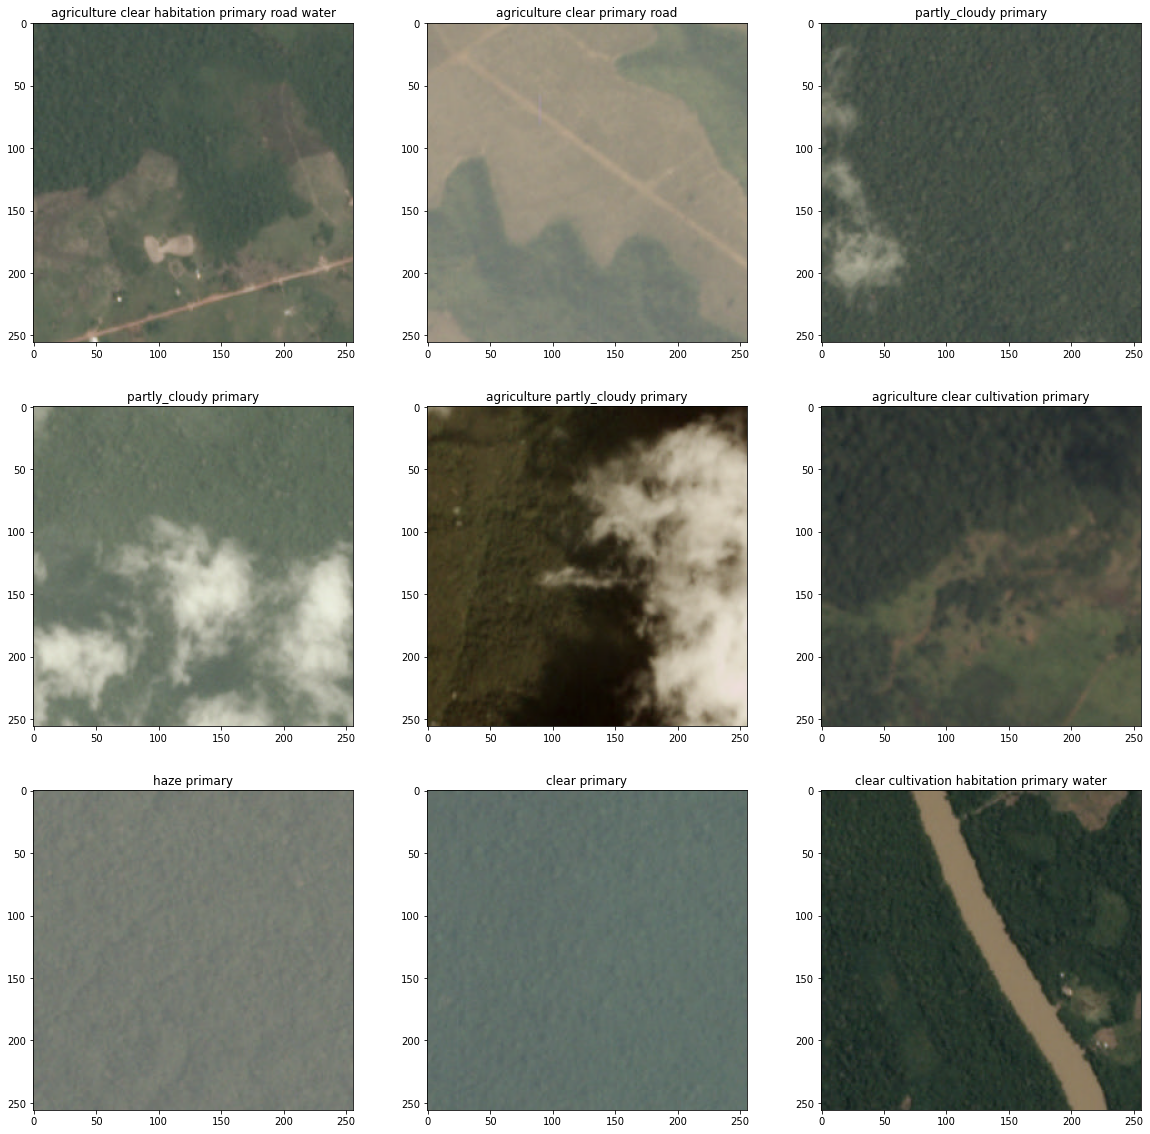

In [24]:
fig,ax = plt.subplots(3,3, figsize = (20,20))
for i,j in enumerate(np.random.randint(0,train.shape[0],9)):
    image_path = '/kaggle/input/planets-dataset/planet/planet/train-jpg/train_{}.jpg'.format(str(j))
    img = cv2.imread(image_path)
    ax[int(i/3),i%3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[int(i/3),i%3].set_title(train.iloc[j,1])

##  Encoding and Processing

In [25]:
x_train = []
y_train = []

for x, tags in tqdm(train.values, miniters=1500):
    img = cv2.imread('/kaggle/input/planets-dataset/planet/planet/train-jpg/{}.jpg'.format(x))
    targets = np.zeros(17)
    for tag in tags.split(' '):
        targets[dic[tag]] = 1
    x_train.append(cv2.resize(img, (32,32)))
    y_train.append(targets)

y_train = np.array(y_train, np.uint8)
x_train = np.array(x_train, np.float16) / 255

print(x_train.shape)
print(y_train.shape)

100%|██████████| 40479/40479 [01:40<00:00, 403.56it/s]


(40479, 32, 32, 3)
(40479, 17)


### Splitting data

In [26]:
split = 33000
x_train, x_test, y_train, y_test = x_train[:split], x_train[split:], y_train[:split], y_train[split:]

# 1st  Model Training

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train,
             batch_size=128,
             epochs=6,
             verbose=1,
             validation_data=(x_test, y_test))

Epoch 1/6
258/258 [==============================] - 43s 165ms/step - loss: 0.2597 - accuracy: 0.4709 - val_loss: 0.2068 - val_accuracy: 0.4930
Epoch 2/6
258/258 [==============================] - 42s 163ms/step - loss: 0.2081 - accuracy: 0.4961 - val_loss: 0.1908 - val_accuracy: 0.4955
Epoch 3/6
258/258 [==============================] - 43s 166ms/step - loss: 0.1946 - accuracy: 0.4959 - val_loss: 0.1758 - val_accuracy: 0.5038
Epoch 4/6
258/258 [==============================] - 42s 163ms/step - loss: 0.1840 - accuracy: 0.4948 - val_loss: 0.1710 - val_accuracy: 0.5010
Epoch 5/6
258/258 [==============================] - 42s 163ms/step - loss: 0.1779 - accuracy: 0.4902 - val_loss: 0.1676 - val_accuracy: 0.5140
Epoch 6/6
258/258 [==============================] - 43s 165ms/step - loss: 0.1753 - accuracy: 0.4842 - val_loss: 0.1614 - val_accuracy: 0.5082


## Evaluation of  Model

In [29]:
valid = model.predict(x_test, batch_size=128)
print(fbeta_score(y_test, np.array(valid) > 0.2, beta=2, average='samples'))

0.8460039607276311


Text(0.5, 1.0, 'Loss Curves - before tweaking')

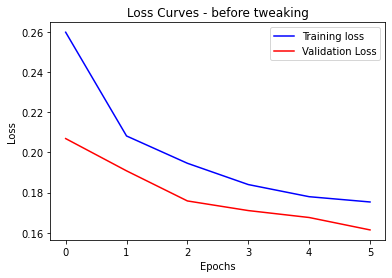

In [30]:
# Visualize Loss

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before tweaking')

## 2 nd Model Training (Add more layers)


In [31]:
model = Sequential()
# Block 1
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

#Block 2
model.add(Conv2D(64, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

#Block 3
model.add(Conv2D(128, (3,3), input_shape=(128,128,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3,3), activation='relu',
                padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(17, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
history = model.fit(x_train, y_train,
                 batch_size=128,
                 epochs=6,
                 verbose=1,
                 validation_data=(x_test, y_test))

Epoch 1/6
258/258 [==============================] - 83s 320ms/step - loss: 0.2155 - accuracy: 0.4902 - val_loss: 0.1751 - val_accuracy: 0.4987
Epoch 2/6
258/258 [==============================] - 84s 325ms/step - loss: 0.1584 - accuracy: 0.5127 - val_loss: 0.1481 - val_accuracy: 0.5304
Epoch 3/6
258/258 [==============================] - 83s 323ms/step - loss: 0.1434 - accuracy: 0.5296 - val_loss: 0.1456 - val_accuracy: 0.5550
Epoch 4/6
258/258 [==============================] - 82s 318ms/step - loss: 0.1372 - accuracy: 0.5364 - val_loss: 0.1331 - val_accuracy: 0.5326
Epoch 5/6
258/258 [==============================] - 83s 321ms/step - loss: 0.1307 - accuracy: 0.5385 - val_loss: 0.1321 - val_accuracy: 0.5400
Epoch 6/6
258/258 [==============================] - 82s 319ms/step - loss: 0.1253 - accuracy: 0.5285 - val_loss: 0.1298 - val_accuracy: 0.5068


# Evaluation of  Model

In [33]:
valid = model.predict(x_test, batch_size=128)
print(fbeta_score(y_test, np.array(valid) > 0.2, beta=2, average='samples'))

0.8819721600947982


Text(0.5, 1.0, 'Loss Curves - after tweaking')

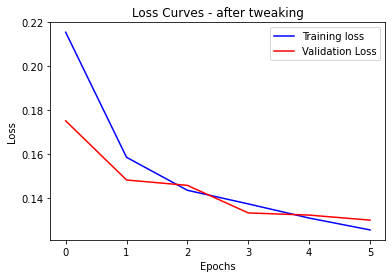

In [34]:
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after tweaking')

# Implementing  Model on test data

In [35]:
x_test = []
x_test_add = []
img_title = []
img_title_add = []

for x in tqdm(listdir('/kaggle/input/planets-dataset/planet/planet/test-jpg'), miniters=1500):
    img_name = x.split('.')[0]
    img = cv2.imread('/kaggle/input/planets-dataset/planet/planet/test-jpg/{}.jpg'.format(img_name))
    x_test.append(cv2.resize(img, (32,32)))
    img_title.append(img_name)
    
for x in tqdm(listdir('/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional'), miniters=1500):
    img_name = x.split('.')[0]
    img = cv2.imread('/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/{}.jpg'.format(img_name))
    x_test_add.append(cv2.resize(img, (32,32)))
    img_title_add.append(img_name)
    
x_test = np.array(x_test, np.float16) / 255
x_test_add = np.array(x_test_add, np.float16) / 255

100%|██████████| 20522/20522 [01:59<00:00, 171.29it/s]


In [36]:
pred1 = model.predict(x_test, batch_size=128)
pred2 = model.predict(x_test_add, batch_size=128)

In [37]:
image1 = []
tags1 = []
for i, img in enumerate(img_title):
    image1.append(img)
    tags1.append(' '.join(np.array(labels)[pred1[i] > 0.2]))
df1 = pd.DataFrame()
df1['image_name'] = image1
df1['tags'] = tags1

image2 = []
tags2 = []
for i, img in enumerate(img_title_add):
    image2.append(img)
    tags2.append(' '.join(np.array(labels)[pred2[i] > 0.2]))
df2 = pd.DataFrame()
df2['image_name'] = image2
df2['tags'] = tags2

In [38]:
full_df = pd.concat([df1, df2])
full_df

image_name                                               tags
0      test_39140        cultivation agriculture primary clear water
1       test_4849                                 primary clear haze
2      test_18979  cultivation agriculture primary clear habitati...
3      test_24790         cultivation agriculture primary clear road
4      test_30624                                      primary clear
...           ...                                                ...
20517   file_6101                              partly_cloudy primary
20518   file_7113                                      primary clear
20519   file_9271               agriculture primary clear water road
20520  file_13908  cultivation agriculture primary clear habitati...
20521   file_8496  cultivation partly_cloudy agriculture primary ...

[61191 rows x 2 columns]

## Saving The output to  submission file

In [39]:
full_df.to_csv('submission.csv', index=False)

In [40]:
pd.read_csv('/kaggle/working/submission.csv')

image_name                                               tags
0      test_39140        cultivation agriculture primary clear water
1       test_4849                                 primary clear haze
2      test_18979  cultivation agriculture primary clear habitati...
3      test_24790         cultivation agriculture primary clear road
4      test_30624                                      primary clear
...           ...                                                ...
61186   file_6101                              partly_cloudy primary
61187   file_7113                                      primary clear
61188   file_9271               agriculture primary clear water road
61189  file_13908  cultivation agriculture primary clear habitati...
61190   file_8496  cultivation partly_cloudy agriculture primary ...

[61191 rows x 2 columns]